<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn08_ConstrainedOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Constrained Optimization - Mathematics
In this R notebook, we consider the mathematics behind the numerical methods that involve Lagrange multipliers using examples.

#### Recall from Lsn 5, we solved this equation as an unconstrained optimization ####
$$\max_{x,y}{f(x,y)=xy-2x-2y-x^2-y^2 }$$ <br>

In [0]:
# Unconstrained Optimization (from class)
f = function(x){(x[1]*x[2]-2*x[1]-2*x[2]-x[1]^2-x[2]^2)*-1}
x0 = c(1,1)
optim(x0,f)

$par
[1] -2.000031 -2.000129

$value
[1] -4

$counts
function gradient 
      71       NA 

$convergence
[1] 0

$message
NULL

Suppose that there are the two constraints that $x+y=7$ and $-2x+y=7$ so that the feasible solution must meet both of these two constraints. <br><br>
$$\max_{x,y}{f(x,y)=xy-2x-2y-x^2-y^2 }$$ <br>
$$ \text{s.t. }x+y=7$$
$$-2x+y=7$$<br><br>
Turning these constraints into matrix form and doing one step of row reduction, we see that the feasible solutions for $x,y$ are very limited.<br><br>
$$\begin{bmatrix}1&1&:&7\\-2&1&:&7\end{bmatrix}\begin{array}{c}2\\ \hspace{1pt}\end{array}\Longrightarrow \begin{bmatrix}1&1&:&7\\0&3&:&21\end{bmatrix}\Longrightarrow \begin{array}{c}x_1=7\\x_2=7\end{array}$$
<br> Notice that there is only one solution and it was rather trivial to find. Do we need to consider the objective function? What if we added another constraint to the problem? We could possibly over constrain the problem and not have a solution. Think back to your linear algerbra class when the matrix was **Full Column Rank**. The solution to those types of matrices (and thus, constraints here) is either one solution or no solution. Therefore, the objective function is not considered because there is only one feasible solution which turns this into a Linear Algebra problem instead of a Constrained Optimization one.

#### Change the problem so that we need the objective function
Instead of those two functions above, let's use the first one only so that the problem is not over-constrained.
$$\max_{x,y}{f(x,y)=xy-2x-2y-x^2-y^2 }$$ <br>
$$ \text{s.t. }x+y=7$$<br><br>
Let's look at the objective function and the constraint on the same contour plot.

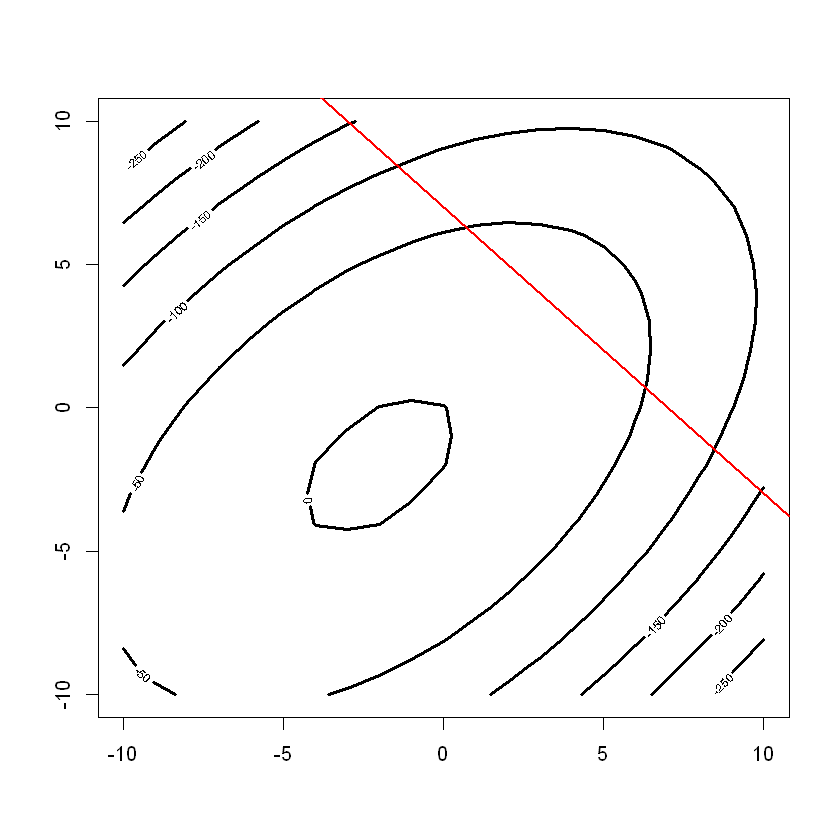

In [0]:
library(ma391laporte)
#help(Outer) - I put an example in my documentation to get out a contour plot
X = list(x=seq(-10,10),y=seq(-10,10))
Z = Outer(f,X)
contour(x=X$x,y=X$y,z=-Z,lwd=3)
abline(a=7,b=-1,col="red",lwd=2)

From yesterday, we know how to find the solution to this problem using R. 
```R
library(MASS);library(NlcOptim)
Aeq = matrix(c(1,1),nrow=1)
Beq = matrix(7)
solnl(x0,f,Aeq=Aeq,Beq=Beq)
```
Using Lagrange Multipliers, we get the following:<br><br>
$$\vec{\triangledown}f = \lambda \vec{\triangledown}g$$<br>
$$\begin{bmatrix}y-2-2x\\x-2-2y\end{bmatrix} = \lambda \begin{bmatrix}1\\1\end{bmatrix} $$<br>
$$g(x,y)=x+y=7$$<br>
Solving these three equations for $(x,y,\lambda)$, we get the same solution as the R code renders. $(x,y,\lambda)=(3.5,3.5,-5.5)$.

## Linear Algebra approach
Let's use the idea of the nullspace of the constraint matrix from Linear Algebra.  The complete solution to $A\vec{x}=\vec{b}$ can be found by finding the nullspace of the one constraint (a much simpler problem than you are used to, but it will hopefully make the point here). Understand that there can be numerous constraints on the problem with numerous decision variables and that this is a simple example to show how to use the constraint matrix. Here, there is $m=1$ constraint and $n=2$ decision variables. Our matrix will always be an $A_{m\text{x}n}$ and will hopefully have a nullspace larger than the zero vector. For the problems where the nullspace is only the zero vector (see the one with two constraints above), there is either one or no solution and the problem is not really an optimization problem because the objective function is not considered. In this problem, we have **Full Row Rank** (although it is only one row) with $n-r=2-1=1$ dimensions in the nullspace. This means that the answer lies somewhere on the line (see the contour plot) and this constitutes our **feasible region**. Solving this problem from this approach allows us to use numerical methods to step towards the answer because we are able to stay in the nullspace of the constraint matrix with our steps. Let's solve this problem in order to gain insight into what is going on.<br><br>
$$ \begin{bmatrix}1&1&:&0\end{bmatrix}\Longrightarrow \text{ special soln }\Longrightarrow x_{null}= \begin{bmatrix}-1\\1\end{bmatrix}$$<br><br>
Use the nullspace to turn the problem into an unconstrained optimization.
$$x_{\text{complete}} = x_{\text{particular}}+x_{\text{null}}=\begin{bmatrix}0\\7\end{bmatrix}+\lambda \begin{bmatrix}-1\\1\end{bmatrix}\Longrightarrow \begin{array}{c}x = -\lambda\\y = 7+\lambda \end{array}$$<br><br>
Since the dimension of the nullspace is only one, there is only one variable in the new objective function. Had the dimension been 2, then there would have been two variables and so on. The new unconstrained objective function is found by substitution of $x,y$ into the original objective function:<br><br>
$$f(\lambda)=(-\lambda (7+\lambda)-2(-\lambda)-2(7+\lambda)-(-\lambda)^2-(7+\lambda)^2 $$<br>
Go back and look at the red line on the contour plot that represented the constraint. Notice how it is impossible to select a $\lambda$ which will not be on that line!!! Therefore, we can simple solve this problem by optimizing $\max_{\lambda}{f(\lambda)}$.The R code below will finish this optimization using Newton's method and the derivative.

In [0]:
library(ma391laporte)
f = function(x){-x*(7+x)-2*(-x)-2*(7+x)-(-x)^2-(7+x)^2}
#help(fprime) # used the fprime newton's method to solve this function numberically
dF = function(x){fprime(f,x)}
ans = newton(dF,10)
print(ans)
#this is not the same lambda (I should have used another variable)

[1] -3.500002


#### How do we use this answer $\lambda$ to find $x,y$?
Our optimal $\lambda$ is -3.5 and we remember the relationship between $x,y$ and $\lambda$.
$$\begin{array}{c}x = -\lambda\\y = 7+\lambda \end{array}$$
So $x = -(-3.5)=3.5$ and $y = 7+(-3.5)=3.5$ and we get the same answer as the analytic solution of Lagrange multipliers, which should not surprise you. This leads to a numerical algorithm which can solve all of our problems and not just the ones that have an analytic solution. 

## Linear Optimization
Linear Optimization is special. The gradient will never be equal to zero (just like the derivative of a 1D linear function ever be zero), therefore we should understand that the optimal lies on the boundary in the form of the corner points of the feasible region. The method of optimizing a linear "program" is known as the Simplex Method (developed by George Dantzig during WWII to assist in logisitics operations) which can be used to solve problems with thousands of variables and constraints.<br> <br>
We will use the lpSolve package in R to solve linear optimization problems.
```R
install.packages("lpSolve") # use this inside R Studio
lp (direction = "min", objective.in, const.mat, const.dir, const.rhs,transpose.constraints = TRUE, int.vec, presolve=0, compute.sens=0,binary.vec, all.int=FALSE, all.bin=FALSE, scale = 196, dense.const,num.bin.solns=1, use.rw=FALSE)
```
where <br><br>
- ```direction```: Character string giving direction of optimization: "min" (default) or "max."
- ```objective.in```: Numeric vector of coefficients of objective function
- ```const.mat```: Matrix of numeric constraint coefficients, one row per constraint, one columnper variable (unless transpose.constraints = FALSE; see below).
- ```const.dir```: Vector  of  character  strings  giving  the  direction  of  the  constraint:  each  valueshould be one of "<," "<=," "=," "==," ">," or ">=". (In each pair the two valuesare identical.)
- ```const.rhs```: Vector of numeric values for the right-hand sides of the 
- ```constraints.transpose.constraints```: By default each constraint occupies a row of const.mat, and that matrix needs tobe transposed before being passed to the optimizing code.  For very large con-straint matrices it may be wiser to construct the constraints in a matrix column-by-column. In that case set transpose.constraints to FALSE.
- ```int.vec```: Numeric vector giving the indices of variables that are required to be integer.The length of this vector will therefore be the number of integer variables.
- ```presolve```: Numeric: presolve? Default 0 (no); any non-zero value means "yes." Currentlyignored.
- ```compute.sens```: Numeric: compute sensitivity? Default 0 (no); any non-zero value means "yes."; Gives shadow prices. Inside ```ans$duals```
- ```all.int```: Logical: should all variables be integer? Default: FALSE. 
- ```all.bin```: Logical: should all variables be binary? Default: FALSE.

<br>
Let's solve a simple problem using this library and function.
$$ \min_{x_1,x_2,x_3,x_4}{50x_1+20x_2+30x_3+80x_4}$$ <br>
$$\text{s.t. }400x_1+200x_2+150x_3+500x_4 \ge 500 $$
$$3x_1+2x_2 \ge 6$$
$$2x_1+2x_2+4x_3+4x_4 \ge 10$$
$$2x_1+4x_2+x_3+5x_4 \ge 8$$

In [0]:
library(lpSolve)
f.obj = c(50,20,30,80)
f.con = matrix(c(400,200,150,500,3,2,0,0,2,2,4,4,2,4,1,5),nrow=4,byrow=T) 
f.dir = c(">=",">=",">=",">=")
f.rhs = c(500,6,10,8)
ans = lp("min",f.obj,f.con,f.dir,f.rhs,compute.sens = T)
print(ans$solution)
print(ans$objval)
print(ans$duals)

[1] 0 3 1 0
[1] 90
[1]  0.0  2.5  7.5  0.0 27.5  0.0  0.0 50.0


Note that the solution to this problem is $x_1=0, x_2=3, x_3=1, x_4=0$ with an objective value of 90. The "duals" or "lambdas" in the problem are 0 for the non-binding constraints (1st and 4th). The last 4 constraints are ones that we do not have to put into the problem and are assumed $x_1,x_2,x_3,x_4 \ge 0$. From the solution, we note that the $x_1=0$ and $x_4=0$ are also binding constraints. There should be a positive lambda for each binding constraint.

## Summary of R commands used in Optimization when to use them:

| R command | Library | Circumstance   |
|--------|------------|-----------|
| optim() | base R |unconstrained optimization  | 
| solnl() | MASS, NlcOptim |constrained nonlinear optimization |
| lp() | lpSolve | linear optimization (sometime called linear programming|